In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
# Load the MNIST dataset
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [4]:
x_t_14 = np.empty(shape=[0,28])
y_t = np.empty(shape=[0,10])

# Process the dataset into 14 of 28 form

for i in y_train:
    x=np.zeros(10)
    x[i]=1
    y_t = np.append(y_t, x)

for i in x_train:
    temp = []
    for x in i:
        temp.append(sum(x))
    temp_arg = np.argsort(temp)
    for x in range(len(temp_arg)):
        if temp_arg[x] < 14:
            temp[x] = 1
        else:
            temp[x] = 0
    x_t_14 = np.append(x_t_14, temp)
    
x_t_14 = x_t_14.reshape(60000,28)
y_t = y_t.reshape(60000,10)

In [30]:
#Creates the model for training
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(28,),activation='relu',trainable=False))
model.add(tf.keras.layers.Dense(10, activation='softmax')) 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# We loop through the subsets of training dataset in iterations of step_size
# We then train the model on the subset but the accuracy is measured against the samples 
# already stored in previous iterations 
p_x = []
p_y = []
step_size = 10
for j in range(0,100,step_size):
    x = x_t_14[j:j+step_size]
    y = y_t[j:j+step_size]
    model.fit(x, y, epochs=30, batch_size=10, verbose=0)
    y_results = model.predict(x_t_14[:j+step_size],verbose=0)
    sol = 0
    # You can note in the loop below that we check the top 3 indices to see whether any of them is right. 
    for k in range(j+step_size):
        if np.argmax(y_results[k]) == y_train[k]:
            sol+=1
            continue
        y_results[k][np.argmax(y_results[k])] = 0
        if np.argmax(y_results[k]) == y_train[k]:
            sol+=1
            continue
        y_results[k][np.argmax(y_results[k])] = 0
        if np.argmax(y_results[k]) == y_train[k]:
            sol+=1
            continue
            
    print("The Accuracy of 14 0f 28 by sum with 100 neurons trained on",j+step_size," samples :",round((sol/(j+step_size))*100),"%")
    p_y.append(round((sol/(j+step_size))*100))
    p_x.append(j+step_size)

The Accuracy of 14 0f 28 by sum with 100 neurons trained on 10  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 20  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 30  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 40  samples : 95 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 50  samples : 96 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 60  samples : 93 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 70  samples : 93 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 80  samples : 91 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 90  samples : 93 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 100  samples : 93 %


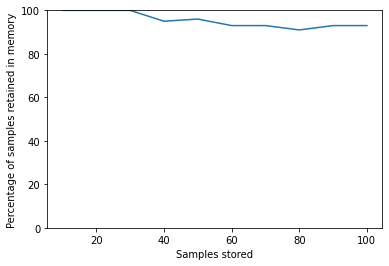

In [36]:
#To plot the graph that shows the percentage of retention

ax = plt.gca()
ax.set_ylim([0, 100])
ax.set
plt.xlabel("Samples stored")
plt.ylabel("Percentage of samples retained in memory")
plt.plot(p_x,p_y);

For Training Data:
(14 0f 28 by sum with 100 neurons) Predicted value : 7  Actual value : 7


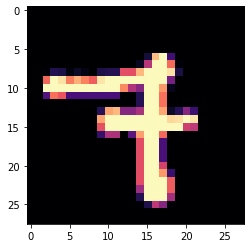

In [39]:
# The interactive part here uses the training dataset whether the SDM is correct.

i = np.random.randint(len(x_train))
temp = []
for x in x_train[i]:
    temp.append(sum(x))
    temp_arg = np.argsort(temp)
for x in range(len(temp_arg)):
    if temp_arg[x] < 14:
            temp[x] = 1
    else:
            temp[x] = 0

result = model.predict(np.array([temp], dtype=np.float32), verbose=0)
print("For Training Data:")
print("(14 0f 28 by sum with 100 neurons) Predicted value :",np.argmax(result)," Actual value :",y_train[i])
plt.imshow(x_train[i], cmap = 'magma')
plt.show()